### EDA:

### Import necessary Libariry and packages:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score

In [2]:
#Load the train and test data and store into respective dataframes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Inspection of the data:

In [69]:
#check the firts 5 records:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#check the last 5 records:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#check the size of the data:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


- There are total 891 rows and 12 columns in the train dats set
- There are total 418 rows and 11 columns in the train dats set

In [5]:
#check the basic informtaion:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- It seems Age, Cabin, Embarked are the columns with missing values in the train set

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Here in test set, Age and Cabin are the 2 columns with missing values

In [7]:
#duplicate records check:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


- There are no duplicate record/row preset in the data

### Data cleaning:
Imputation strategy1:
- Drop all the misiing values from the data

Imputation strategy1:
- Impute the missing values with an arbitrary or a constant value, such as 0 

Imputation strategy3:
- Impute missing Cabin data with it's most frequently occuring value (Mode)
- Impute missing Embarked data with it's most frequently occuring value (Mode)
- Impute missing Age data with it's mean value 

Imputation strategy4:
- Impute missing Cabin data with a separate category, 'Missing'
- Impute missing Embarked data with mode value
- Impute missing Age data according to respective Gender's mean value 

`Proceeding further with the strategy4 here to deal with the missing values for this data:`

In [3]:
#Impute missing Cabin data
train['Cabin'] = np.where(train['Cabin'].isnull()==True, 'Missing', train['Cabin'])
print(train['Cabin'].isnull().sum()) 


#Impute missing Embarked data 
train['Embarked'] = np.where(train['Embarked'].isnull()==True, train['Embarked'].mode(), train['Embarked'])
print(train['Embarked'].isnull().sum())


#Impute missing Age data
female_avg_age = train[train['Sex']=='female']['Age'].mean()
male_avg_age = train[train['Sex']=='male']['Age'].mean()

train['Age'] = np.where(((train['Age'].isnull()) & (train['Sex']=='female')), female_avg_age, train['Age'])
train['Age'] = np.where(((train['Age'].isnull()) & (train['Sex']=='male')), male_avg_age, train['Age'])
print(train['Age'].isnull().sum())

0
0
0


### Descriptive statitics or summary statistics

In [72]:
#Summary for numerical features:
train.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 75% of the passengers were below age 38. There were infant passengers boarded with age less than 1 year. 
- Standard devaition for Fare is high indicating lot of variation in the fares the passengers paid. 75% of the passengers paid Fare below 31. There were passengers who did not pay the fare, those may be the crew members of the ship. The highest paid fare was 512
- Most of the passengers boarded with less than one sibling or spouse, which indicates that most of the passengers travelled alone

### EDA : Visualization and hypothesis testing
In this part the following questions are asked and answered through visualization techniques and statistical analysis
- Is the data proportionate?
- How Survival is correlated to other attributes of the dataset?
- Is Age and Gender of the passengers related to survival?
- Did passenger class played role in his/her survival? How fare is related here?
- How age alone impacted the chance of survival?
- How Embarkation varied across different ports?

**EDA1:Let's check at first the proportion of the survived passengers**

<AxesSubplot:ylabel='Survived'>

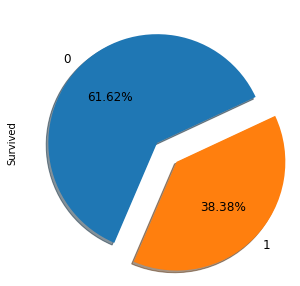

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
train.Survived.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

Observation:
- Unfortunately, out of all the 891 passengers only 38% survived and 62% did not
- Also, we can say that the dataset is not disproportionate, hence in the further processing we need not apply any up-sampling or down-samplnig technique to make the data proportionate 

**EDA2: Age and Gender of the passengers related to survival or not**

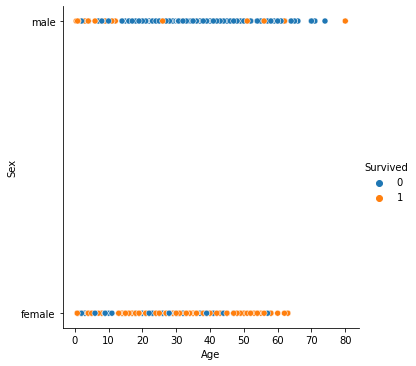

In [12]:
sns.relplot(x = 'Age', y = 'Sex', data = train, hue = 'Survived')

Observations
- From the above graph, it is clear that female passengers have higher rate of survival than male passengers
- Also, aged female shows higher chance of srvival than younger female, which is opposite trend male passengers

Let's perform a chi2 test to establish our above claim that 'Sex' and 'Survived' are related to each other:

In [18]:
#Now do the chi2 test to establish the claim - Fare and Survival is related or not:
from scipy.stats import chi2_contingency as chi

observed_values = pd.crosstab(train['Sex'], train['Survived'])

#store the results into diff variables:
c,p,dof,exp_val = chi(observed_values)

#check the p-value of the test:
if p<0.05:
    print('Reject the Null hypothesis')
    print('There is a relation between Sex & Survival')
else:
    print('Do not reject the Null hypothesis')
    print('There is no relation between Sex & Survival')

Reject the Null hypothesis
There is a relation between Sex & Survival


**So, based on the result from chi2 test and our analysis, 'Sex' can be an important feature in predicting the survival chance of a passenger.**

**EDA3: Class of the passengers related to survival or not**

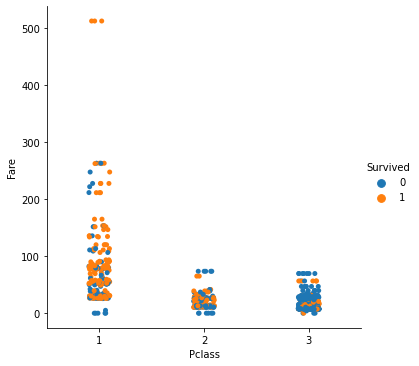

In [23]:
sns.catplot(x = 'Pclass', y = 'Fare', data = train, hue='Survived')

Observations:
- It seems that 1st class or Class1 passengers paid Fare from very low to very high. Whereas, the passengers from other 2 classes have paid very low fare (all below 100).
- All those passengers who have paid the highest Fare (almost 512) did survive
- The second obervation here is that the survival is remarkably high for the 1st class passengers. And the passengers from 3rd class mostly did not survive

Let's see how Fare is related to Survival:

In [39]:
train.drop('Fare_bin', axis=1, inplace=True)

In [41]:
print('Maximum fare was:',train['Fare'].max())
print('Manimum fare was:',train['Fare'].min())

#Discretize Fare first:
train['Fare_bin'] = pd.cut(x = train['Fare'], bins=[0,100,200,300,600], labels=['Below 100','100 to 200','200 to 300','300+'])

#now chech if 'fare' has any relation with 'survived':
pd.crosstab(train['Fare_bin'], train['Survived'], normalize='index')

Maximum fare was: 512.3292
Manimum fare was: 0.0


Survived,0,1
Fare_bin,,
Below 100,0.633050,0.366950
100 to 200,0.242424,0.757576
200 to 300,0.352941,0.647059
300+,0.000000,1.000000


- Given the fare is below 100, then there is only 36% chance of survival
- Given the fare is between 100 to 200, then there is 75% chance of survival
- Given the fare is between 200 to 300, then there is 64% chance of survival
- Given the fare is above 300, then there is 100% chance of survival

**So, based on the above analysis we can say that Fare and passenger class both played a vital role in their chance of survival**

**EDA4: How age alone impacted the chance of survival**

In [44]:
#create bin using fucntions:
age_range = train['Age'].max() - train['Age'].min()

#set the boundaries
min_value = int(np.floor(train['Age'].min()))
max_value = int(np.ceil(train['Age'].max()))

#intervalue for bin width:
inter_value = int(np.round(age_range/5))

#now create the intervals:
intervals = [i for i in range(min_value, (max_value+inter_value), inter_value)]

#use age labels
labels = [f'Bin{i}' for i in range(1, len(intervals))]

#now create a new colm with binned value:
train['Age_Binned'] = pd.cut(x = train['Age'], bins=intervals, labels=labels)

#check the age intervals also then create another colm for the intervals:
train['Age_Binned_limits'] = pd.cut(x = train['Age'], bins=intervals)
train['Age_Binned_limits'].head(3)

0    (16, 32]
1    (32, 48]
2    (16, 32]
Name: Age_Binned_limits, dtype: category
Categories (5, interval[int64]): [(0, 16] < (16, 32] < (32, 48] < (48, 64] < (64, 80]]

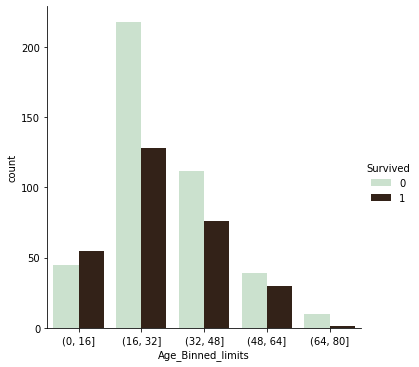

In [48]:
sns.catplot(x = 'Age_Binned_limits', kind = 'count', palette = 'ch:0.95', data = train, hue = 'Survived')

Observations:
- It seems that most of the on-board passengers were aged between 16 to 32 followed by age range 32 to 48. There were very few passengers of age above 64 and less than 16
- Only for the age group 0 to 16, the number of survived passengers is higher than the not-survived passengers

**EDA5: Let’s see how Embarkation impacts Survival**

In [9]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[train.Survived], columns=[train.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]
port

,Cherbourg,Queenstown,Southampton
Survived,,,
0,75,47,427
1,93,30,219


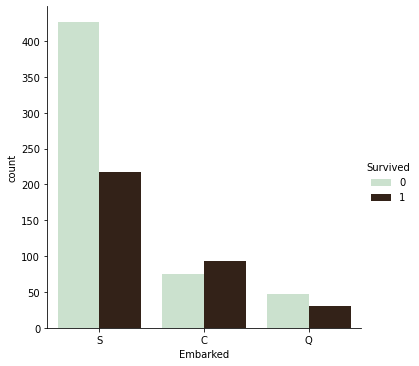

In [52]:
sns.catplot(x = 'Embarked', kind = 'count', palette = 'ch:0.95', data = train, hue = 'Survived')

Observations:
- We can also observe that lot of passengers embarked from port of Southampton ('S'). But the survival proportion of such passengers is less than 50%. Whereas, the passengers who embarked from port of Cherbourg ('C') shows higher proportion of survival. 

**EDA6: Let’s see if there is any relation between siblings/spouse present and survival of such passengers**

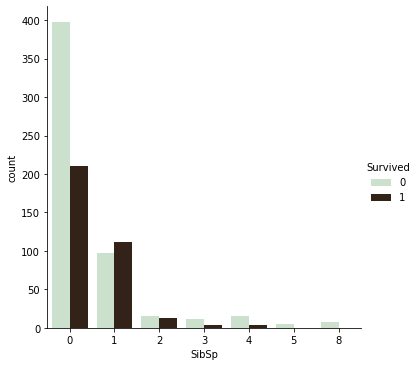

In [6]:
sns.catplot(x = 'SibSp', kind = 'count', palette = 'ch:0.95', data = train, hue = 'Survived')

Observation:
- It seems that where the number of SibSp is relatively higher (5,8) such passengers did not survive. With less SibSp, passengers survived more

### Feature Engineering:
- Create new feature 'IsAlone' using existing features 'SibSp' and 'Parch', to check if a passenger were alone then what is the chance of his/her survival

In [40]:
#Alone dataframe i.e. the passenger has no siblings or parents
titanic_df = train.copy()
alone_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]

#Add Alone column
alone_df['Alone'] = 'Alone'

#Not alone data frame i.e. the passenger has either a sibling or a parent.
not_alone_df = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
not_alone_df['Alone'] = 'Not Alone'

#Merge the above dataframes
comb = [alone_df, not_alone_df]

# Merge and sort by index
titanic_df = pd.concat(comb).sort_index()
titanic_df.head()

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,0,Mr,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,0,Mrs,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,1,Miss,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,0,Mrs,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,1,Mr,Alone


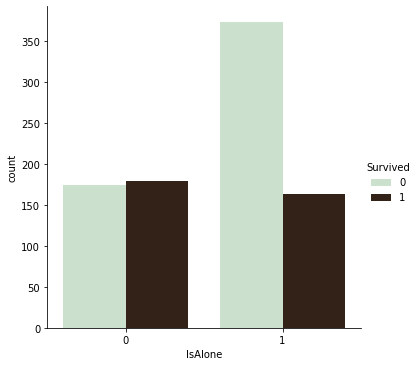

In [41]:
sns.catplot(x = 'IsAlone', kind = 'count', palette = 'ch:0.95', data = train, hue = 'Survived')

Observations:
- It seems that the survival chance is less for those who travelled alone, whereas passengers travelled with family shows higher chance of survival

### Conclusion based on EDA:
###### From above applied different EDA techniques, here are few major findings  
- Being a 'male' passenger, with Pclass as 3 reduced the chance for one to survive
- Passengers who paid the highest Fare, all survived
- If the passenger travelled alone then there is less chance that he/she survived
- Older 'feamle' passengers with passengers had more chance of survival than young 'female' passengers